----------------
# Spiegazione
<img src="fig/heatmap.PNG">

**LEGEND**

Il grafico mette a confronto i tentativi utilizzati da _knuth_ con i tentativi utilizzati dalla rete in esame.

In particolare, nell'asse delle y abbiamo i tentativi che ha impiegato _knuth_ per risolvere il match, mentre nell'asse delle x il numero di tentativi del player.

- E.g. Scrorrendo la riga 1 abbiamo il numero di partite vinte da knuth con 1 tentativo, e in corrispondenza della colonna 4 abbiamo un +1, Questo vuol dire che knuth ha risolto 1a partita con 1 solo tentativo, mentre per la stessa partita il player ha impiegato 4 tentativi.

- E.g. Scorrendo la riga 3 possiamo vedere come Knuth abbia vinto 3+8+16+23+2+2+2+5 partite in 3 tentativi. Mentre il player di queste partite non ne ha concluse 5 (colonna 10+), e nella maggior parte dei casi (23volte) ha impiegato 6 tentativi

-------------------------------

In [3]:
!ls ./matchesPlayed/

model_20191026_1947_play.csv  model_20191026_1947_play_cuts.csv


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

--------------
**PARAMS**

In [8]:
KNUTH_PATH = "../2_database/dbPlayers/knuth/knuth_optimal.csv"

PLAYER_PATH = "./matchesPlayed/model_20191026_1947_play.csv"

-------------------

In [9]:
df_list = []
features_name = ['Guess 1', 'Guess 2', 'Guess 3', 'Guess 4', 'Guess 5',
              'Guess 6', 'Guess 7', 'Guess 8', 'Guess 9', 'Guess 10']

target_name = 'PASSWORD'

# Optimize the df load
feature_type = {}
cuts_type = {}
feature_type[target_name] = str
for feature in features_name:
    feature_type[feature] = str

In [10]:
df_knuth = pd.read_csv(KNUTH_PATH, delimiter=',',encoding='utf-8', skip_blank_lines=True)
df_player = pd.read_csv(PLAYER_PATH, delimiter=',',encoding='utf-8', skip_blank_lines=True)

assert len(df_knuth) == len(df_player), "DF must be the same lenght of 1296 matches"
assert all(df_knuth.iloc[:][target_name] == df_player.iloc[:][target_name]), "DF must be ordered in the same way"

*The PASSWORD field must be ordered*

In [11]:
df_knuth.head()

,Guess 1,Guess 2,Guess 3,Guess 4,Guess 5,Guess 6,Guess 7,Guess 8,Guess 9,Guess 10,PASSWORD
0,AABB20,BFEB00,DEAD10,AAAC30,AAAA40,<pad>,<pad>,<pad>,<pad>,<pad>,AAAA
1,AABB30,ACAB30,ACBB20,AAAB40,<pad>,<pad>,<pad>,<pad>,<pad>,<pad>,AAAB
2,AABB20,BAFD10,FAEA11,AACC30,AAAC40,<pad>,<pad>,<pad>,<pad>,<pad>,AAAC
3,AABB20,AFCC10,EAEA11,AADD30,AAAD40,<pad>,<pad>,<pad>,<pad>,<pad>,AAAD
4,AABB20,AFDA11,DDEB01,ACBF10,AAAE40,<pad>,<pad>,<pad>,<pad>,<pad>,AAAE


In [12]:
df_player.head()

,Guess 1,Guess 2,Guess 3,Guess 4,Guess 5,Guess 6,Guess 7,Guess 8,Guess 9,Guess 10,PASSWORD
0,DDAE10,CDFF00,BBBE00,AAAA40,<pad>,<pad>,<pad>,<pad>,<pad>,<pad>,AAAA
1,DDAE10,CDFF00,BBBE01,AAAB40,<pad>,<pad>,<pad>,<pad>,<pad>,<pad>,AAAB
2,DDAE10,CDFF01,BCBE01,ABAC30,ABAF20,AEAC30,AEAC30,AEAC30,AEAC30,XXXX,AAAC
3,DDAE11,DBBD10,DAFA12,AAAD40,<pad>,<pad>,<pad>,<pad>,<pad>,<pad>,AAAD
4,DDAE20,DDBF00,EEAE20,AAAE40,<pad>,<pad>,<pad>,<pad>,<pad>,<pad>,AAAE


In [13]:
def calculate_match_len(row):
    match_len = 0
    for guess in row:
        if guess != '<pad>':
            match_len += 1
        if guess == 'XXXX':
            match_len = 11
    return match_len

In [14]:
matrix_analysis = np.zeros((5,11))

In [15]:
for match_knuth, match_player in zip(df_knuth[features_name].values, df_player[features_name].values):
    knuth_len = calculate_match_len(match_knuth)
    player_len = calculate_match_len(match_player)
    matrix_analysis[(knuth_len - 1), (player_len - 1)] += 1

In [16]:
matrix_analysis

array([[  0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   1.,   4.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   2.,   7.,  21.,   9.,   6.,   6.,   0.,   0.,  10.],
       [  1.,   7.,  35., 115., 136., 104.,  54.,  25.,   8.,   3.,  42.],
       [  0.,   6.,  46., 148., 169., 156.,  74.,  25.,   8.,   3.,  64.]])

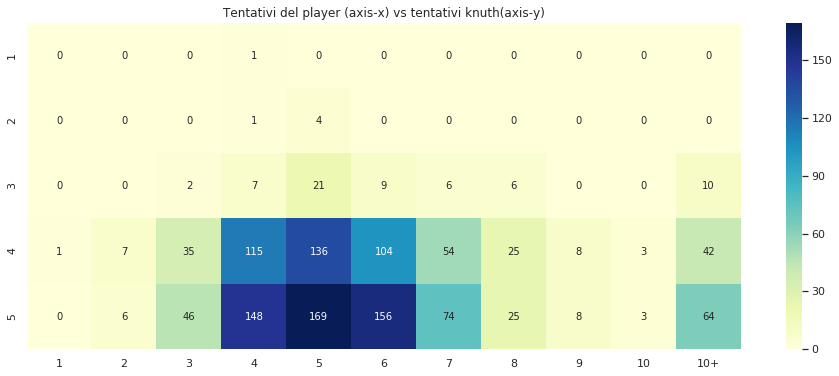

In [17]:
plt.figure(figsize=(16, 6))
plt.xlabel('Player')
plt.ylabel('Knuth')
plt.title('Tentativi del player (axis-x) vs tentativi knuth(axis-y)')
xticklabels = [str(i) for i in range(1,11)]
xticklabels.append('10+')
yticklabels = [str(i) for i in range(1,6)]
sns.heatmap(matrix_analysis, annot=True, cmap="YlGnBu", fmt="g", 
            xticklabels=xticklabels, yticklabels=yticklabels)